# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
#checkapi = requests.get("http://api.openweathermap.org/data/2.5/weather?appid=3dd7ee89d375aae64434e675c2fc81f3&q=chicago").json()
#pprint(checkapi)

{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 41.85, 'lon': -87.65},
 'dt': 1644076770,
 'id': 4887398,
 'main': {'feels_like': 259.31,
          'humidity': 69,
          'pressure': 1034,
          'temp': 262.23,
          'temp_max': 264.28,
          'temp_min': 258.86},
 'name': 'Chicago',
 'sys': {'country': 'US',
         'id': 2005153,
         'sunrise': 1644065929,
         'sunset': 1644102625,
         'type': 2},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 242, 'gust': 3.13, 'speed': 1.34}}


In [98]:

city_info_df = pd.DataFrame(cities, columns=["city"])
city_info_df

,city
0,illoqqortoormiut
1,butaritari
2,mandan
3,pisco
4,geraldton
...,...
622,wuxue
623,broome
624,qandahar
625,bambous virieux


In [100]:
city_info_df['lat'] = ""
city_info_df['lng'] = ""
city_info_df['max temp'] = ""
city_info_df['humidity'] = ""
city_info_df['cloudiness'] = ""
city_info_df['windspeed'] = ""
city_info_df['country'] = ""
city_info_df['date'] = ""
city_info_df.head()

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,dat,date
0,illoqqortoormiut,,,,,,,,,
1,butaritari,,,,,,,,,
2,mandan,,,,,,,,,
3,pisco,,,,,,,,,
4,geraldton,,,,,,,,,


In [87]:

# city_info_df = pd.DataFrame({
#     "city": checkapi['name'],
#     "lat": checkapi['coord']['lat'],
#     "lng":checkapi['coord']['lon'],
#     "max temp": checkapi['main']['temp_max'],
#     "humidity": checkapi['main']['humidity'],
#     "cloudiness": checkapi['weather'][0]['main'],
#     "windspeed": checkapi['wind']['speed'],
#     "country": checkapi['sys']['country'],
#     "date": checkapi['dt']
# },index=[0])
# city_info_df

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date
0,Chicago,41.85,-87.65,264.28,69,Clouds,1.34,US,1644076770


In [88]:
# city_info_df = pd.DataFrame({
#     "city": [checkapi['name']],
#     "lat": [checkapi['coord']['lat']],
#     "lng": [checkapi['coord']['lon']],
#     "max temp": [checkapi['main']['temp_max']],
#     "humidity": [checkapi['main']['humidity']],
#     "cloudiness": [checkapi['weather'][0]['main']],
#     "windspeed": [checkapi['wind']['speed']],
#     "country": [checkapi['sys']['country']],
#     "date": [checkapi['dt']]
# })
# city_info_df

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date
0,Chicago,41.85,-87.65,264.28,69,Clouds,1.34,US,1644076770


In [77]:
# for c in cities[0:5]:
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     # Build query URL
#     print(c)
#     query_url = url + "appid=" + weather_api_key + "&q=" + c
#     print(query_url)

illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=3dd7ee89d375aae64434e675c2fc81f3&q=illoqqortoormiut
butaritari
http://api.openweathermap.org/data/2.5/weather?appid=3dd7ee89d375aae64434e675c2fc81f3&q=butaritari
mandan
http://api.openweathermap.org/data/2.5/weather?appid=3dd7ee89d375aae64434e675c2fc81f3&q=mandan
pisco
http://api.openweathermap.org/data/2.5/weather?appid=3dd7ee89d375aae64434e675c2fc81f3&q=pisco
geraldton
http://api.openweathermap.org/data/2.5/weather?appid=3dd7ee89d375aae64434e675c2fc81f3&q=geraldton


In [105]:
# for c in cities[0:5]:
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     query_url = url + "appid=" + weather_api_key + "&q=" + c
#     weather_response = requests.get(query_url)
#     pprint(weather_response.json())

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + c

In [ ]:
#     "city": checkapi['name'],
#     "lat": checkapi['coord']['lat'],
#     "lng":checkapi['coord']['lon'],
#     "max temp": checkapi['main']['temp_max'],
#     "humidity": checkapi['main']['humidity'],
#     "cloudiness": checkapi['weather'][0]['main'],
#     "windspeed": checkapi['wind']['speed'],
#     "country": checkapi['sys']['country'],
#     "date": checkapi['dt']

In [115]:
for index, row in city_info_df.iterrows():
    city = row['city']
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    #print(weather_response.json())

    try:
        

        results = weather_response.json()

        city_info_df.loc[index, 'name'] = results['name']
        city_info_df.loc[index, 'lat'] = results['coord']['lat']
        city_info_df.loc[index, 'lng'] = results['coord']['lon']
        city_info_df.loc[index, 'max temp'] = results['main']['temp_max']
        city_info_df.loc[index, 'humidity'] = results['main']['humidity']
        city_info_df.loc[index, 'cloudiness'] = results['clouds']['all']
        city_info_df.loc[index, 'windspeed'] = results['wind']['speed']
        city_info_df.loc[index, 'country'] = results['sys']['country']
        city_info_df.loc[index, 'date'] = results['dt']


    except (KeyError, IndexError):
        print(f"city {city} not found")

city_info_df
    

city illoqqortoormiut not found
city chikoy not found
city karaul not found
city attawapiskat not found
city tsihombe not found
city taolanaro not found
city we not found
city vaitupu not found
city falealupo not found
city ngukurr not found
city amderma not found
city mrirt not found
city saleaula not found
city nizhneyansk not found
city rungata not found
city pokrovsk-uralskiy not found
city fort saint john not found
city tumannyy not found
city mys shmidta not found
city guajara-mirim not found
city louisbourg not found
city barentsburg not found
city buqayq not found
city lolua not found
city tarudant not found
city burica not found
city vestbygda not found
city karauzyak not found
city dolbeau not found
city belushya guba not found
city grand river south east not found
city sug-aksy not found
city meyungs not found
city palabuhanratu not found
city galiwinku not found
city sentyabrskiy not found
city longlac not found
city sataua not found
city nguiu not found
city skalistyy not 

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,dat,date,name
0,illoqqortoormiut,,,,,,,,,,NaN
1,butaritari,3.0707,172.7902,301.3,73,52,8.64,KI,,1644099844,Butaritari
2,mandan,46.8267,-100.8896,280.39,72,0,3.6,US,,1644099845,Mandan
3,pisco,-13.7,-76.2167,296.49,83,0,3.6,PE,,1644099835,Pisco
4,geraldton,-28.7667,114.6,296.38,88,100,4.63,AU,,1644099845,Geraldton
...,...,...,...,...,...,...,...,...,...,...,...
622,wuxue,29.8506,115.5525,276.38,56,98,3.69,CN,,1644100023,Wuxue
623,broome,42.2506,-75.833,264.38,69,0,0.89,US,,1644100023,Broome
624,qandahar,,,,,,,,,,NaN
625,bambous virieux,-20.3428,57.7575,299.38,89,40,5.14,MU,,1644100024,Bambous Virieux


In [117]:
import scipy.stats as st
import sklearn.datasets as dta
from scipy.stats import sem

In [118]:
city_info_df.count()

city          627
lat           627
lng           627
max temp      627
humidity      627
cloudiness    627
windspeed     627
country       627
dat           627
date          627
name          578
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [137]:
city_info_df['max temp'] = city_info_df['max temp'].astype(float)
city_info_df['humidity'] = city_info_df['humidity'].astype(float)
city_info_df['cloudiness'] = city_info_df['cloudiness'].astype(float)
city_info_df['windspeed'] = city_info_df['windspeed'].astype(float)
print(city_info_df.dtypes)

city           object
lat            object
lng            object
max temp      float64
humidity      float64
cloudiness    float64
windspeed     float64
country        object
dat            object
date           object
dtype: object


/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_26568/843484059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info_df['max temp'] = city_info_df['max temp'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_26568/843484059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info_df['humidity'] = city_info_df['humidity'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_26568/843484059.py:3: SettingWithCopyWarning: 
A value is trying to

In [139]:
city_df = city_info_df[city_info_df['humidity'] <= 100]
city_df

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date
1,butaritari,3.0707,172.7902,301.0,73.0,52.0,8.64,KI,1644099844
2,mandan,46.8267,-100.8896,280.0,72.0,0.0,3.60,US,1644099845
3,pisco,-13.7,-76.2167,296.0,83.0,0.0,3.60,PE,1644099835
4,geraldton,-28.7667,114.6,296.0,88.0,100.0,4.63,AU,1644099845
5,solnechnyy,50.7214,136.6319,256.0,98.0,100.0,0.23,RU,1644099845
...,...,...,...,...,...,...,...,...,...
621,palana,59.1167,159.9667,258.0,86.0,100.0,3.55,RU,1644100023
622,wuxue,29.8506,115.5525,276.0,56.0,98.0,3.69,CN,1644100023
623,broome,42.2506,-75.833,264.0,69.0,0.0,0.89,US,1644100023
625,bambous virieux,-20.3428,57.7575,299.0,89.0,40.0,5.14,MU,1644100024


In [152]:
mean = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].mean()
median = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].median()
mode = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].mode
variance = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].var()
std = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].std()
min = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].min()
max = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].max()
count = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].count()
count

max temp      578
humidity      578
cloudiness    578
windspeed     578
dtype: int64

In [212]:
df = pd.DataFrame(count)
df = df.T
df



,max temp,humidity,cloudiness,windspeed
0,578,578,578,578


In [214]:
df = df.rename(index={0:'count'})
df

,max temp,humidity,cloudiness,windspeed
count,578,578,578,578


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'max Temp')

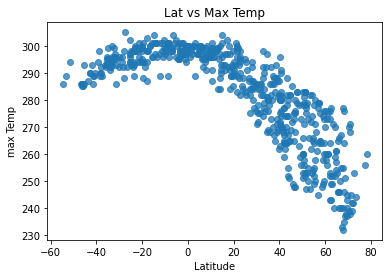

In [164]:

plt.scatter(city_df['lat'],city_df['max temp'],marker='o',alpha=0.75)
plt.title("Lat vs Max Temp")
plt.xlabel('latitude')
plt.ylabel('max Temp')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'humidity')

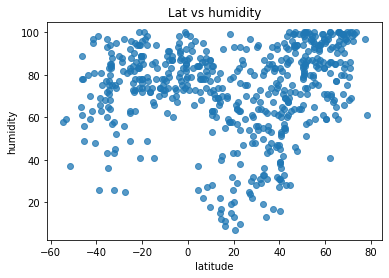

In [165]:
plt.scatter(city_df['lat'],city_df['humidity'],marker='o',alpha=0.75)
plt.title("Lat vs humidity")
plt.xlabel('latitude')
plt.ylabel('humidity')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'cloudiness')

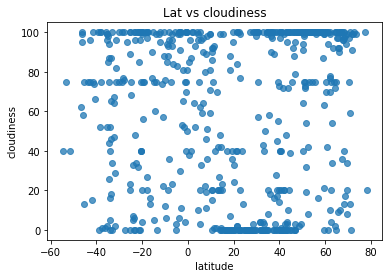

In [166]:
plt.scatter(city_df['lat'],city_df['cloudiness'],marker='o',alpha=0.75)
plt.title("Lat vs cloudiness")
plt.xlabel('latitude')
plt.ylabel('cloudiness')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'windspeed')

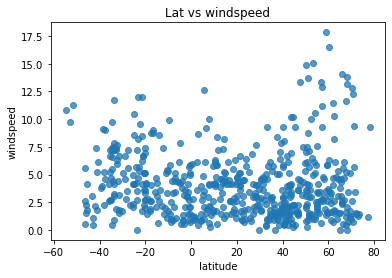

In [167]:
plt.scatter(city_df['lat'],city_df['windspeed'],marker='o',alpha=0.75)
plt.title("Lat vs windspeed")
plt.xlabel('latitude')
plt.ylabel('windspeed')

## Linear Regression

In [176]:
north_city_df = city_df[city_df['lat'] >= 0]
south_city_df = city_df[city_df['lat'] <= 0]
north_city_df['lat'] = north_city_df['lat'].astype(float)
south_city_df['lat'] = south_city_df['lat'].astype(float)

/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_26568/2994345698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_city_df['lat'] = north_city_df['lat'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_26568/2994345698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_city_df['lat'] = south_city_df['lat'].astype(float)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7139217844862245


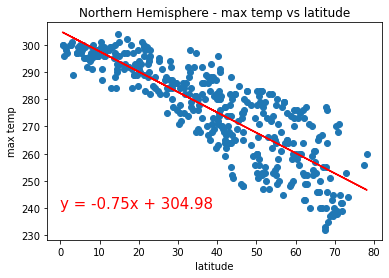

In [180]:
x_values = north_city_df['lat']
y_values = north_city_df['max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,240),fontsize=15,color="red")
plt.title("Northern Hemisphere - max temp vs latitude")
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4052323130336205


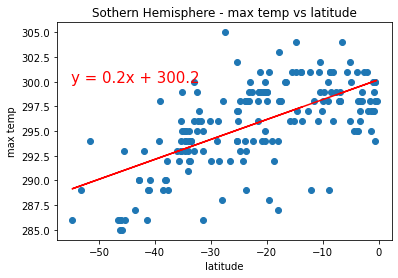

In [186]:
x_values = south_city_df['lat']
y_values = south_city_df['max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,300),fontsize=15,color="red")
plt.title("Sothern Hemisphere - max temp vs latitude")
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13783047278245147


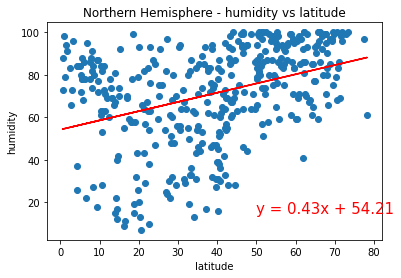

In [185]:
x_values = north_city_df['lat']
y_values = north_city_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - humidity vs latitude")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10412039796269842


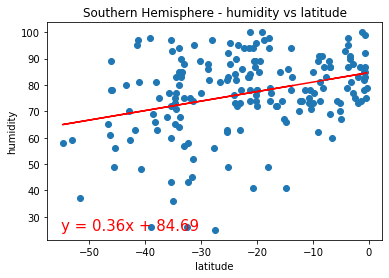

In [187]:
x_values = south_city_df['lat']
y_values = south_city_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - humidity vs latitude")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06893404966352805


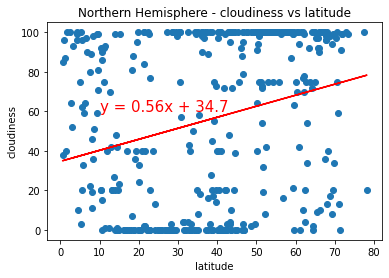

In [194]:
x_values = north_city_df['lat']
y_values = north_city_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.title("Northern Hemisphere - cloudiness vs latitude")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007217270243417437


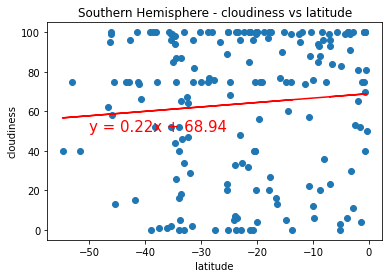

In [193]:
x_values = south_city_df['lat']
y_values = south_city_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - cloudiness vs latitude")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011806418406549578


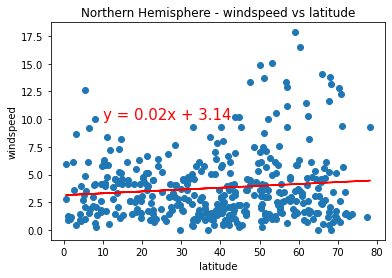

In [196]:
x_values = north_city_df['lat']
y_values = north_city_df['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - windspeed vs latitude")
plt.xlabel('latitude')
plt.ylabel('windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06254622155548624


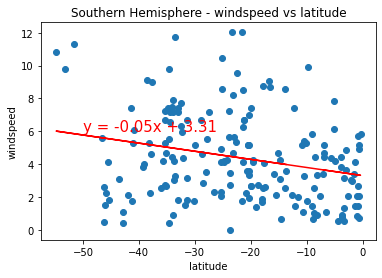

In [198]:
x_values = south_city_df['lat']
y_values = south_city_df['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title("Southern Hemisphere - windspeed vs latitude")
plt.xlabel('latitude')
plt.ylabel('windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()